## In this notebook I will write a script to generate two plots showing the percentages of death from top 10 diseases in the World and Especially in Austrlia to show the devastating effects of Dementia

## To do this, I will use the "global_mortality.xlsx" file

First, let's import the necessary libraries to do the task

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

### Now, let's import the dataset and store it as df

In [2]:
df = pd.read_excel("global_mortality.xlsx")

### Let's observe first few rows of the datafrane to have an idea about the dataset

In [3]:
df.head()

,country,country_code,year,Cardiovascular diseases (%),Cancers (%),Respiratory diseases (%),Diabetes (%),Dementia (%),Lower respiratory infections (%),Neonatal deaths (%),...,Parkinson disease (%),Alcohol disorders (%),Intestinal infectious diseases (%),Drug disorders (%),Hepatitis (%),Fire (%),Heat-related (hot and cold exposure) (%),Natural disasters (%),Conflict (%),Terrorism (%)
0,Afghanistan,AFG,1990,17.610397,4.025975,2.106626,3.832555,0.531429,10.886362,9.184653,...,0.025159,0.028998,0.183330,0.041205,0.138738,0.174157,0.137823,0.000000,0.932,0.007
1,Afghanistan,AFG,1991,17.801807,4.054145,2.134176,3.822228,0.532497,10.356968,8.938897,...,0.025451,0.029172,0.178107,0.042033,0.135008,0.170671,0.134827,0.797603,2.044,0.040
2,Afghanistan,AFG,1992,18.386833,4.173959,2.208298,3.900125,0.540066,10.095546,8.841380,...,0.026122,0.029973,0.176855,0.043843,0.134582,0.171171,0.139053,0.340210,2.408,0.027
3,Afghanistan,AFG,1993,18.959646,4.269233,2.283923,3.974113,0.553813,9.873841,8.676409,...,0.027044,0.030456,0.173467,0.045350,0.133888,0.171032,0.150136,0.116263,NaN,NaN
4,Afghanistan,AFG,1994,19.089513,4.256034,2.307721,3.968954,0.550087,9.530242,8.384454,...,0.027180,0.030103,0.165135,0.045744,0.130486,0.167263,0.148970,0.075506,4.296,0.010


In [4]:
df.shape

(6156, 35)

### There are 6156 rows and 35 columns in the dataset. However, our main target is to look at the top 10 diseases. So, let's have a look at the column names so that we can select accordingly.

In [5]:
df.columns

Index(['country', 'country_code', 'year', 'Cardiovascular diseases (%)',
       'Cancers (%)', 'Respiratory diseases (%)', 'Diabetes (%)',
       'Dementia (%)', 'Lower respiratory infections (%)',
       'Neonatal deaths (%)', 'Diarrheal diseases (%)', 'Road accidents (%)',
       'Liver disease (%)', 'Tuberculosis (%)', 'Kidney disease (%)',
       'Digestive diseases (%)', 'HIV/AIDS (%)', 'Suicide (%)', 'Malaria (%)',
       'Homicide (%)', 'Nutritional deficiencies (%)', 'Meningitis (%)',
       'Protein-energy malnutrition (%)', 'Drowning (%)',
       'Maternal deaths (%)', 'Parkinson disease (%)', 'Alcohol disorders (%)',
       'Intestinal infectious diseases (%)', 'Drug disorders (%)',
       'Hepatitis (%)', 'Fire (%)', 'Heat-related (hot and cold exposure) (%)',
       'Natural disasters (%)', 'Conflict (%)', 'Terrorism (%)'],
      dtype='object')

### The next step is to select the columns upto top 10 diseases which cause death and create a new dataframe

In [6]:
df = df.iloc[:,:13]

#### Let's check the head of the dataframe

In [7]:
df.head()

,country,country_code,year,Cardiovascular diseases (%),Cancers (%),Respiratory diseases (%),Diabetes (%),Dementia (%),Lower respiratory infections (%),Neonatal deaths (%),Diarrheal diseases (%),Road accidents (%),Liver disease (%)
0,Afghanistan,AFG,1990,17.610397,4.025975,2.106626,3.832555,0.531429,10.886362,9.184653,2.497141,3.715944,0.836909
1,Afghanistan,AFG,1991,17.801807,4.054145,2.134176,3.822228,0.532497,10.356968,8.938897,2.572228,3.729142,0.845516
2,Afghanistan,AFG,1992,18.386833,4.173959,2.208298,3.900125,0.540066,10.095546,8.841380,2.707743,3.816357,0.874525
3,Afghanistan,AFG,1993,18.959646,4.269233,2.283923,3.974113,0.553813,9.873841,8.676409,3.360793,3.884374,0.900513
4,Afghanistan,AFG,1994,19.089513,4.256034,2.307721,3.968954,0.550087,9.530242,8.384454,3.083801,3.856048,0.905218


#### Now, have a look at the unique values in each column

In [8]:
df.nunique()

country                              228
country_code                         196
year                                  27
Cardiovascular diseases (%)         6156
Cancers (%)                         6156
Respiratory diseases (%)            6156
Diabetes (%)                        6156
Dementia (%)                        6156
Lower respiratory infections (%)    6156
Neonatal deaths (%)                 6156
Diarrheal diseases (%)              6156
Road accidents (%)                  6156
Liver disease (%)                   6156
dtype: int64

#### It has records of the past 27 years and of 196 which is great. Now, let's check if there is any null values in the dataframe

In [9]:
df.isnull().sum()

country                               0
country_code                        864
year                                  0
Cardiovascular diseases (%)           0
Cancers (%)                           0
Respiratory diseases (%)              0
Diabetes (%)                          0
Dementia (%)                          0
Lower respiratory infections (%)      0
Neonatal deaths (%)                   0
Diarrheal diseases (%)                0
Road accidents (%)                    0
Liver disease (%)                     0
dtype: int64

#### we only have null values in the  country_code column which is cool because we will not use it anyway

In [10]:
df.describe()

,year,Cardiovascular diseases (%),Cancers (%),Respiratory diseases (%),Diabetes (%),Dementia (%),Lower respiratory infections (%),Neonatal deaths (%),Diarrheal diseases (%),Road accidents (%),Liver disease (%)
count,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000
mean,2003.000000,29.934725,14.386538,4.100138,6.286225,3.220558,5.839226,4.566662,3.195824,2.531215,2.124215
std,7.789514,14.020056,8.154350,2.346382,4.435643,2.746177,3.424340,3.854815,4.358954,2.187774,1.241740
min,1990.000000,1.428594,0.582273,0.298003,0.327133,0.044752,0.684583,0.040714,0.008251,0.278404,0.192933
25%,1996.000000,18.744377,6.926644,2.262846,3.198259,1.012759,3.209850,0.685594,0.178763,1.355803,1.337752
50%,2003.000000,30.652382,13.307459,3.627799,4.991020,2.525405,5.138461,3.891828,0.767651,1.928722,1.825508
75%,2010.000000,38.446610,21.359066,5.378911,7.931770,4.330103,8.160968,7.740025,5.285289,2.903291,2.535969
max,2016.000000,67.387681,33.617499,16.289395,35.816187,16.672481,20.035185,17.806831,25.184488,20.900877,11.647082


#### Up next, I will create another dataframe with only information of Australia

In [11]:
df_australia  = df.loc[df['country'] == "Australia"]

#### Let's check it

In [12]:
df_australia.head()

,country,country_code,year,Cardiovascular diseases (%),Cancers (%),Respiratory diseases (%),Diabetes (%),Dementia (%),Lower respiratory infections (%),Neonatal deaths (%),Diarrheal diseases (%),Road accidents (%),Liver disease (%)
297,Australia,AUS,1990,43.396495,25.316863,6.036020,4.297665,4.767712,1.457010,0.728405,0.031598,2.287321,1.118065
298,Australia,AUS,1991,42.878376,25.755889,6.070918,4.386156,4.931701,1.471299,0.680936,0.035788,2.138201,1.111450
299,Australia,AUS,1992,42.509304,25.996661,6.167821,4.468788,5.058251,1.507774,0.655911,0.039846,2.003989,1.090286
300,Australia,AUS,1993,42.011516,26.324600,6.174642,4.588636,5.192850,1.545378,0.607507,0.045529,1.905619,1.077470
301,Australia,AUS,1994,41.607992,26.510248,6.220914,4.707583,5.293152,1.606017,0.572339,0.050016,1.832073,1.070082


In [13]:
df_australia.describe()

,year,Cardiovascular diseases (%),Cancers (%),Respiratory diseases (%),Diabetes (%),Dementia (%),Lower respiratory infections (%),Neonatal deaths (%),Diarrheal diseases (%),Road accidents (%),Liver disease (%)
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2003.000000,36.621978,27.920605,6.086964,5.789515,7.124329,2.142288,0.486332,0.091629,1.483616,1.182152
std,7.937254,4.093438,1.315177,0.114531,0.855324,1.496528,0.397986,0.104364,0.043111,0.361020,0.092158
min,1990.000000,31.327371,25.316863,5.865192,4.297665,4.767712,1.457010,0.305988,0.031598,0.999301,1.065724
25%,1996.500000,32.630413,26.871753,6.005264,5.062831,5.726855,1.808011,0.432497,0.058122,1.194481,1.099476
50%,2003.000000,36.327869,27.988202,6.076276,5.999302,7.256596,2.294420,0.482205,0.081597,1.439987,1.176117
75%,2009.500000,40.213591,29.241091,6.194457,6.601491,8.458607,2.418774,0.523661,0.121669,1.714630,1.269906
max,2016.000000,43.396495,29.642513,6.248400,6.759277,9.090695,2.669860,0.728405,0.168877,2.287321,1.336974


#### I will use the average of each disease for 26 years to plot on the Bar chart. So, let's check the mean of each column

In [14]:
df.mean()

year                                2003.000000
Cardiovascular diseases (%)           29.934725
Cancers (%)                           14.386538
Respiratory diseases (%)               4.100138
Diabetes (%)                           6.286225
Dementia (%)                           3.220558
Lower respiratory infections (%)       5.839226
Neonatal deaths (%)                    4.566662
Diarrheal diseases (%)                 3.195824
Road accidents (%)                     2.531215
Liver disease (%)                      2.124215
dtype: float64

In [15]:
df_australia.mean()

year                                2003.000000
Cardiovascular diseases (%)           36.621978
Cancers (%)                           27.920605
Respiratory diseases (%)               6.086964
Diabetes (%)                           5.789515
Dementia (%)                           7.124329
Lower respiratory infections (%)       2.142288
Neonatal deaths (%)                    0.486332
Diarrheal diseases (%)                 0.091629
Road accidents (%)                     1.483616
Liver disease (%)                      1.182152
dtype: float64

#### In the next step, let's only select the columns of the top 10 diseases

In [16]:
df_plot = df.iloc[:,3:]

In [17]:
df_plot.head()

,Cardiovascular diseases (%),Cancers (%),Respiratory diseases (%),Diabetes (%),Dementia (%),Lower respiratory infections (%),Neonatal deaths (%),Diarrheal diseases (%),Road accidents (%),Liver disease (%)
0,17.610397,4.025975,2.106626,3.832555,0.531429,10.886362,9.184653,2.497141,3.715944,0.836909
1,17.801807,4.054145,2.134176,3.822228,0.532497,10.356968,8.938897,2.572228,3.729142,0.845516
2,18.386833,4.173959,2.208298,3.900125,0.540066,10.095546,8.841380,2.707743,3.816357,0.874525
3,18.959646,4.269233,2.283923,3.974113,0.553813,9.873841,8.676409,3.360793,3.884374,0.900513
4,19.089513,4.256034,2.307721,3.968954,0.550087,9.530242,8.384454,3.083801,3.856048,0.905218


In [18]:
df_australia_plot = df_australia.iloc[:,3:]

In [19]:
df_australia_plot.head()

,Cardiovascular diseases (%),Cancers (%),Respiratory diseases (%),Diabetes (%),Dementia (%),Lower respiratory infections (%),Neonatal deaths (%),Diarrheal diseases (%),Road accidents (%),Liver disease (%)
297,43.396495,25.316863,6.036020,4.297665,4.767712,1.457010,0.728405,0.031598,2.287321,1.118065
298,42.878376,25.755889,6.070918,4.386156,4.931701,1.471299,0.680936,0.035788,2.138201,1.111450
299,42.509304,25.996661,6.167821,4.468788,5.058251,1.507774,0.655911,0.039846,2.003989,1.090286
300,42.011516,26.324600,6.174642,4.588636,5.192850,1.545378,0.607507,0.045529,1.905619,1.077470
301,41.607992,26.510248,6.220914,4.707583,5.293152,1.606017,0.572339,0.050016,1.832073,1.070082


#### Let's round the number to 2 decimal points

In [20]:
df_plot = df_plot.round(decimals=2)

In [21]:
df_australia_plot = df_australia_plot.round(decimals=2)

In [22]:
df_plot.columns = ['Cardiovascular Diseases','Cancers','Respiratory Diseases','Diabetes','DEMENTIA','Lower Respiratory Infections','Neonatal Deaths','Diarrheal Diseases','Road Accidents','Liver Disease']

In [23]:
df_plot.head()

,Cardiovascular Diseases,Cancers,Respiratory Diseases,Diabetes,DEMENTIA,Lower Respiratory Infections,Neonatal Deaths,Diarrheal Diseases,Road Accidents,Liver Disease
0,17.61,4.03,2.11,3.83,0.53,10.89,9.18,2.50,3.72,0.84
1,17.80,4.05,2.13,3.82,0.53,10.36,8.94,2.57,3.73,0.85
2,18.39,4.17,2.21,3.90,0.54,10.10,8.84,2.71,3.82,0.87
3,18.96,4.27,2.28,3.97,0.55,9.87,8.68,3.36,3.88,0.90
4,19.09,4.26,2.31,3.97,0.55,9.53,8.38,3.08,3.86,0.91


In [24]:
df_australia_plot.columns = ['Cardiovascular Diseases','Cancers','Respiratory Diseases','Diabetes','DEMENTIA','Lower Respiratory Infections','Neonatal Deaths','Diarrheal Diseases','Road Accidents','Liver Disease']

In [25]:
df_australia_plot.head()

,Cardiovascular Diseases,Cancers,Respiratory Diseases,Diabetes,DEMENTIA,Lower Respiratory Infections,Neonatal Deaths,Diarrheal Diseases,Road Accidents,Liver Disease
297,43.40,25.32,6.04,4.30,4.77,1.46,0.73,0.03,2.29,1.12
298,42.88,25.76,6.07,4.39,4.93,1.47,0.68,0.04,2.14,1.11
299,42.51,26.00,6.17,4.47,5.06,1.51,0.66,0.04,2.00,1.09
300,42.01,26.32,6.17,4.59,5.19,1.55,0.61,0.05,1.91,1.08
301,41.61,26.51,6.22,4.71,5.29,1.61,0.57,0.05,1.83,1.07


### Now, I will create two bar graphs, one to show the percentage of people dying from top 10 diseases in the world and another only in Australia. Then I will compare the two plots to decribe meaningful information about Dementia.

Importing font style to use

In [26]:
csfont = {'fontname':'Comic Sans MS'}
plt.rcParams.update({'font.size': 20})

### Up next,let's create the first plot

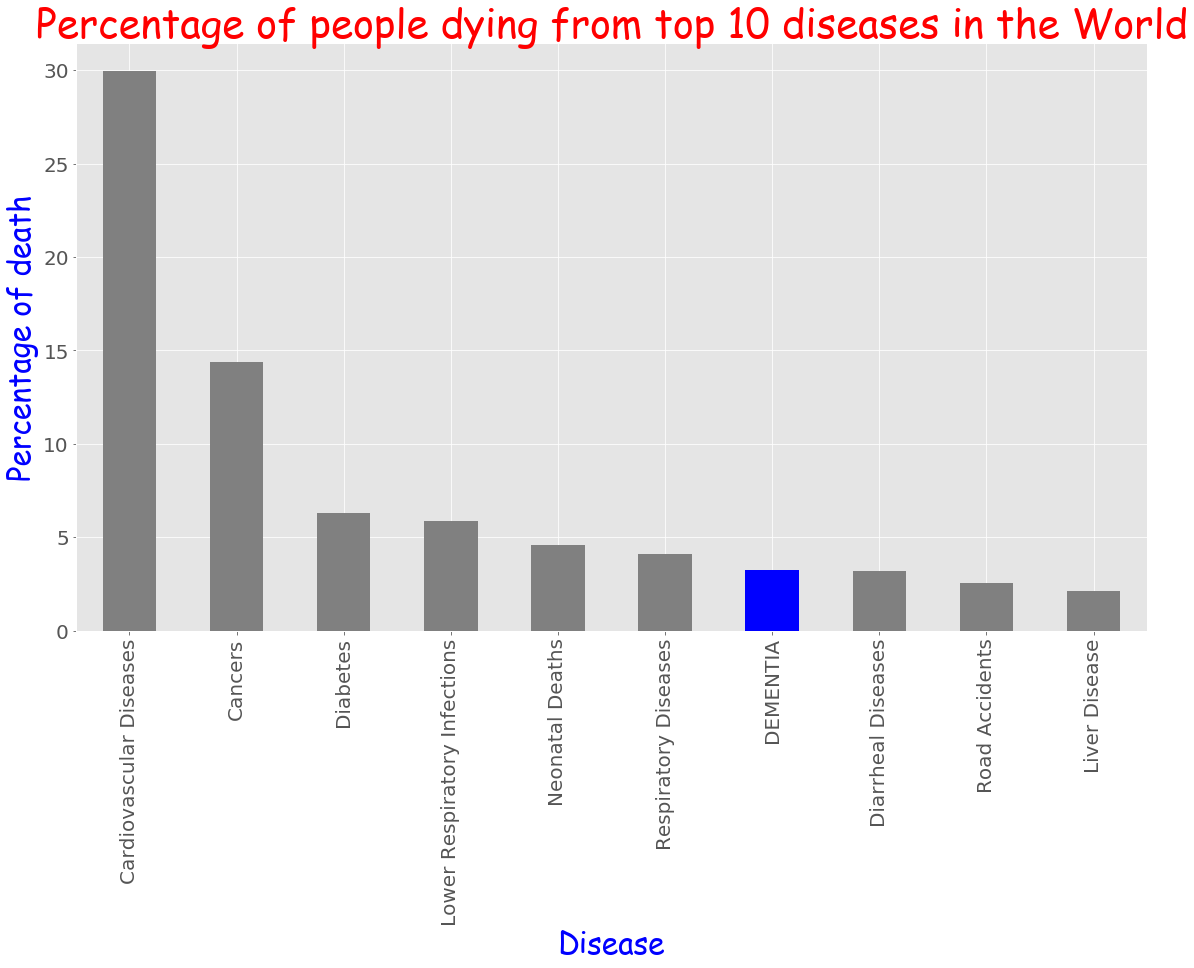

In [28]:
fig, ax = plt.subplots()
ax = df_plot.mean().sort_values(ascending=False).plot(kind='bar',figsize=(19.20,10.80),color=['gray','gray','gray','gray','gray','gray','blue','gray','gray','gray'])
ax.set_title('Percentage of people dying from top 10 diseases in the World', size=40, color='red',**csfont)
ax.set_xlabel('Disease',size=30, color='blue',**csfont)
ax.set_ylabel('Percentage of death',size=30,color='blue',**csfont)


plt.savefig('percentage_world.png', dpi=300, bbox_inches='tight')

### We can see that Dementia is the 7th leading cause of death in the whole world with less than 4%. Let's make the second plot of stats only in Australia

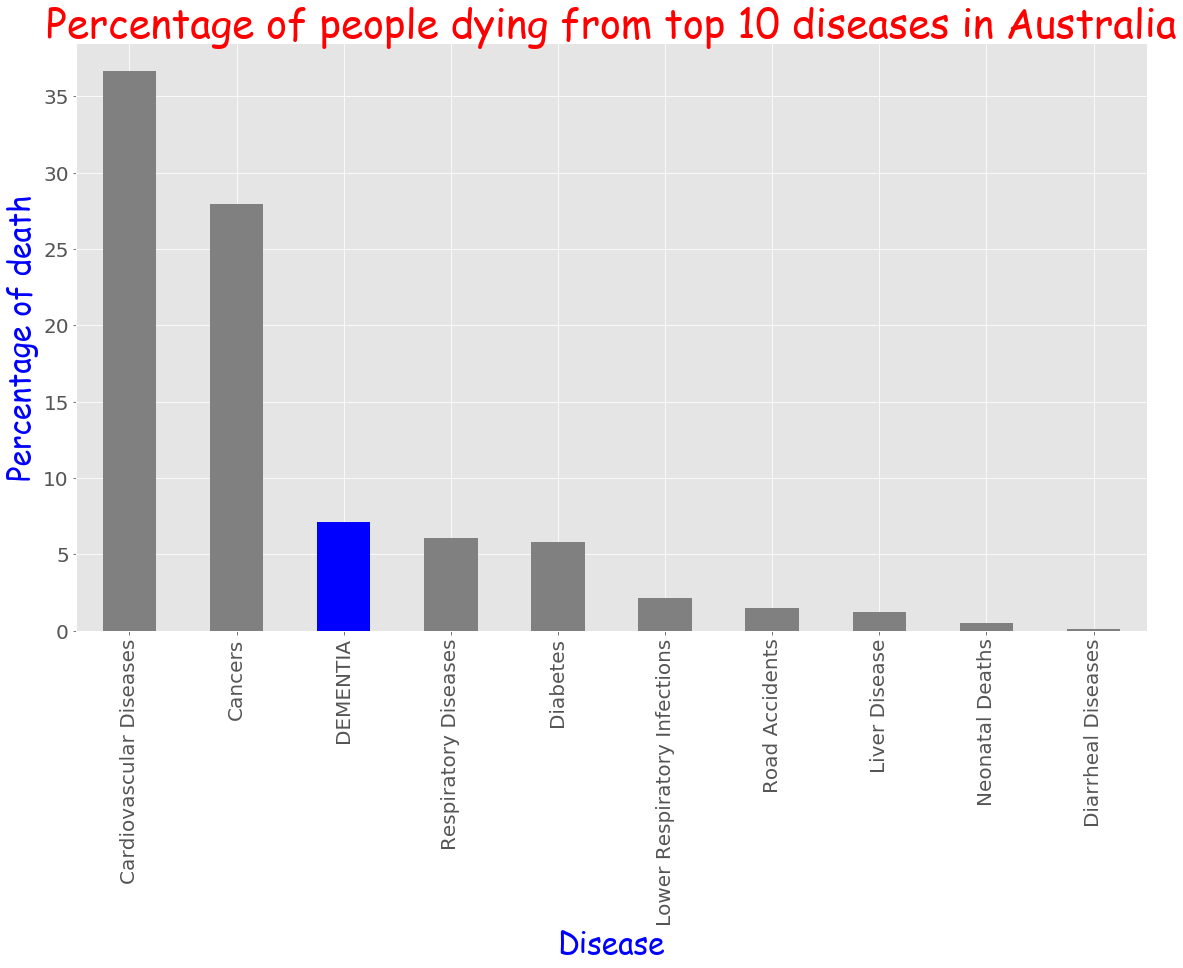

In [29]:
fig, ax = plt.subplots()
ax = df_australia_plot.mean().sort_values(ascending=False).plot(kind='bar',figsize=(19.20,10.80),color=['gray','gray','blue','gray','gray','gray','gray','gray','gray','gray'])
ax.set_title('Percentage of people dying from top 10 diseases in Australia', size=40, color='red',**csfont)
ax.set_xlabel('Disease',size=30, color='blue',**csfont)
ax.set_ylabel('Percentage of death',size=30,color='blue',**csfont)
plt.savefig('percentage_aus.png', dpi=300, bbox_inches='tight')

### From the second plot, we can see that Dementia is the 3rd leading cause of death for the average of 26 years in Austrlia which is an alarming rate. Therefore, more awareness should be created about Dementia in Australia

## References

https://www.kaggle.com/michaelpawlus/global-causes-of-mortality/version/1#